<a href="https://colab.research.google.com/github/atikahlestar/Data-Science/blob/main/Project_3_Predicting_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 3
Memprediksi Harga Mobil Berdasarkan Spesifikasi untuk Membantu Mengoptimalkan Penentuan Harga di Perusahaan Otomotif.

### Car Price Dataset
    Dataset tentang spesifikasi dan harga mobil.

### Sumber Data
https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

### Masalah Bisnis
    Bagaimana cara meningkatkan pendapatan dari penjualan mobil dengan memprediksi harga mobil yang akurat berdasarkan spesifikasi?

### Tujuan
    Membangun model regresi untuk memprediksi harga mobil.

### Data Cleansing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/Shared drives/atikahlestari31/Project/Dataset/Car Price.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(file_path)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
## Check Missing Values

In [7]:
df.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [8]:
## Check Outliers

In [9]:
df_num = df.select_dtypes(["int64","float64"])
col_num = df_num.columns
col_num

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
for col in col_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5 *iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for car_ID
(0, 26)
Running for symboling
(0, 26)
Running for wheelbase
(3, 26)
Running for carlength
(1, 26)
Running for carwidth
(8, 26)
Running for carheight
(0, 26)
Running for curbweight
(0, 26)
Running for enginesize
(10, 26)
Running for boreratio
(0, 26)
Running for stroke
(20, 26)
Running for compressionratio
(28, 26)
Running for horsepower
(6, 26)
Running for peakrpm
(2, 26)
Running for citympg
(2, 26)
Running for highwaympg
(3, 26)
Running for price
(15, 26)


In [11]:
df.shape

(205, 26)

In [12]:
## Check Duplicated

In [13]:
df.duplicated().sum()

0

### EDA

In [14]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [16]:
col_num

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
## Univariate Analysis

In [18]:
len(col_num)

16

In [19]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


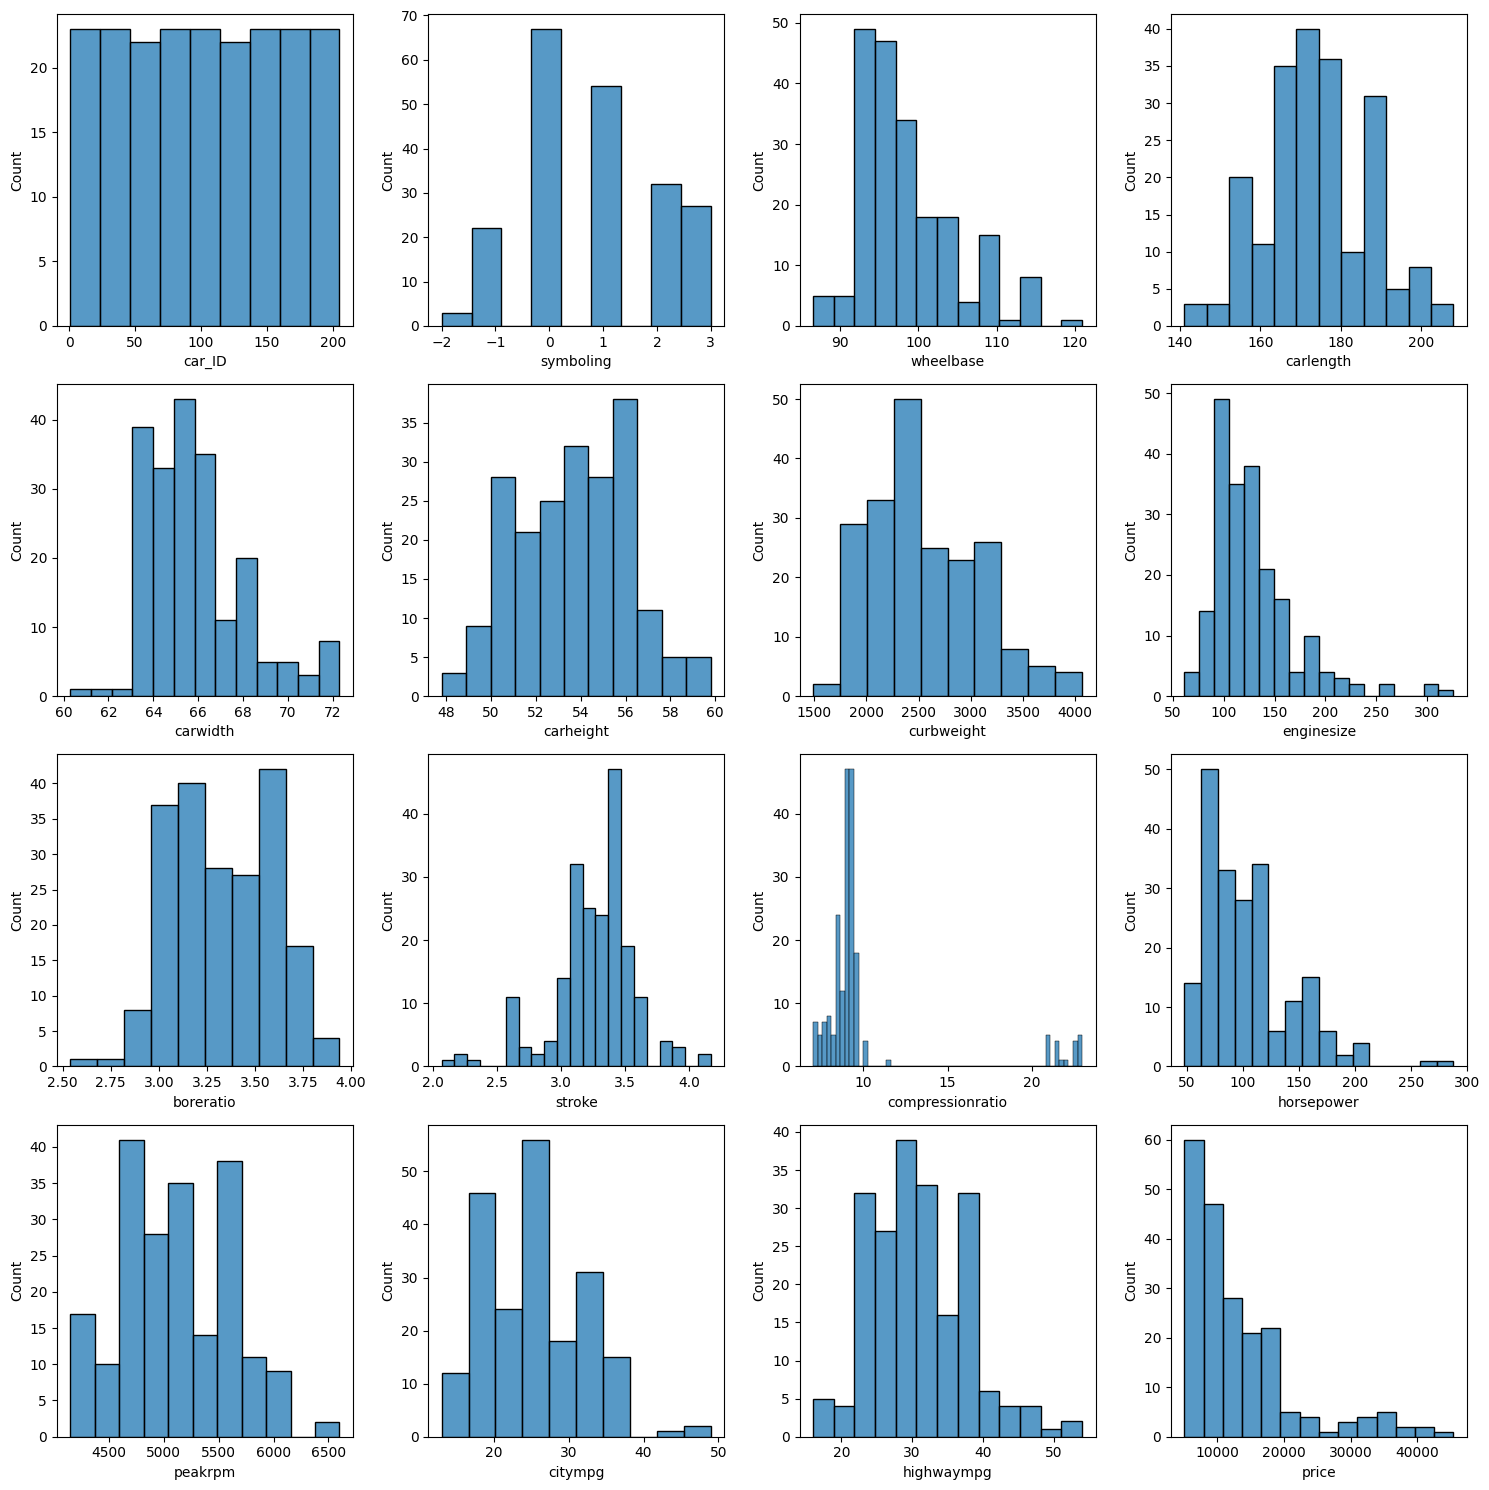

In [20]:
plt.figure(figsize = (15,15))
for i in range(len(col_num)):
    plt.subplot(4,4, i+1)
    sns.histplot(x = col_num[i], data = df)
    plt.tight_layout()


In [21]:
## Multivariate Analysis

In [22]:
filtered_col = col_num[2:10].tolist()
filtered_col

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke']

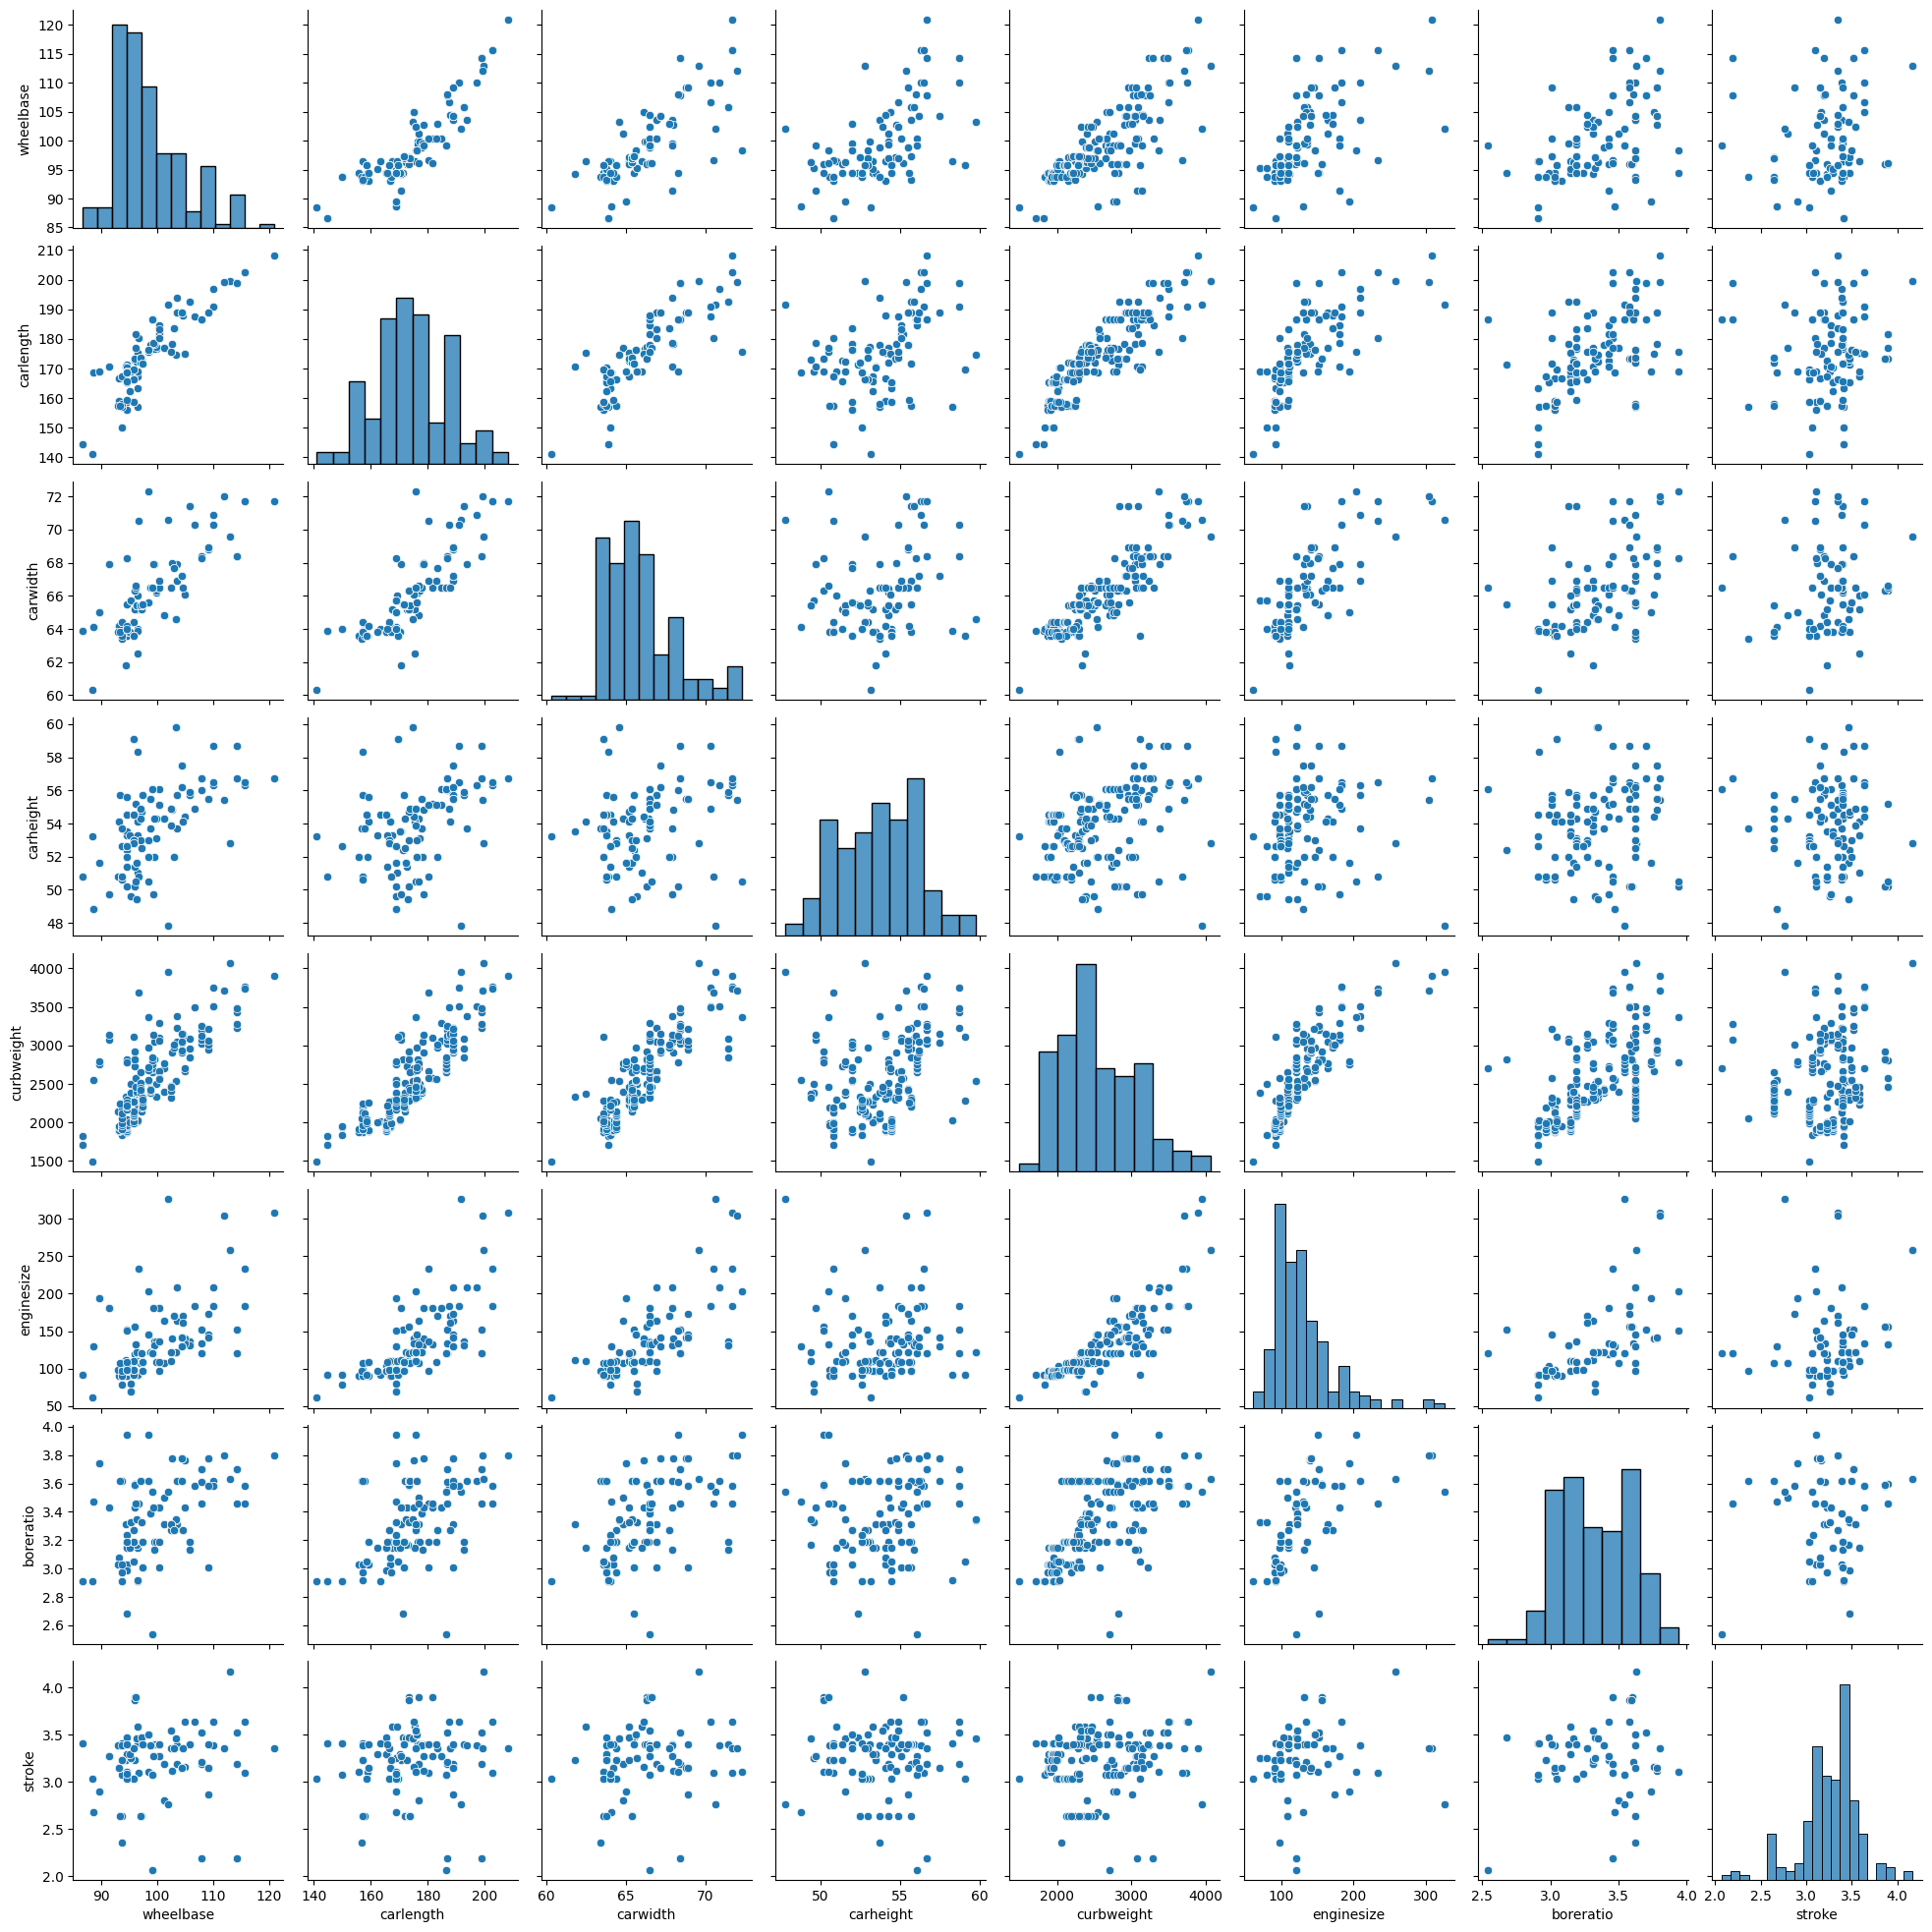

In [23]:
sns.pairplot(df[filtered_col])

<Axes: >

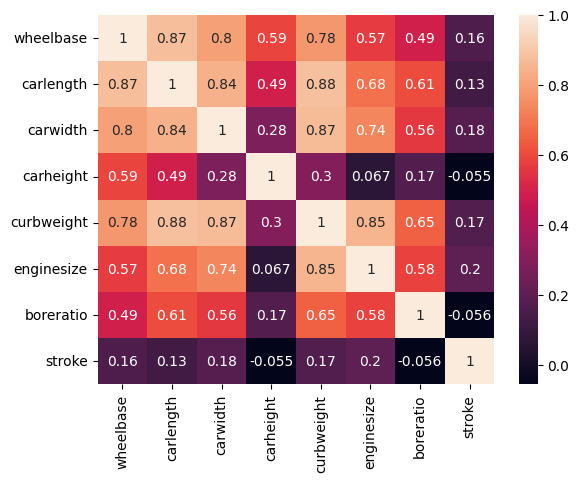

In [24]:
sns.heatmap(df[filtered_col].corr(), annot = True)

### Additional Data Preparation before Modeling

In [25]:
## Feature Engineering

In [26]:
df["car_area"] = df["carheight"] * df["carwidth"]

In [27]:
df["car_volume"] = df["car_area"] * df["carheight"]

In [28]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_area,car_volume
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,3128.08,152650.304
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,3128.08,152650.304
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,3432.20,179847.280
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,3594.66,195190.038
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,3605.52,195779.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,3823.95,212229.225
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,3818.40,211921.200
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,3823.95,212229.225
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,3823.95,212229.225


In [29]:
## One Hot Encoding

In [30]:
df = df.drop(columns = ["CarName"])

In [31]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_area,car_volume
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,3128.08,152650.304
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,3128.08,152650.304
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,3432.20,179847.280
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,3594.66,195190.038
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,3605.52,195779.736


In [32]:
df_obj = df.select_dtypes("object")
col_obj = df_obj.columns.tolist()

In [33]:
col_obj

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [34]:
df = pd.get_dummies(df, columns = col_obj)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   wheelbase              205 non-null    float64
 3   carlength              205 non-null    float64
 4   carwidth               205 non-null    float64
 5   carheight              205 non-null    float64
 6   curbweight             205 non-null    int64  
 7   enginesize             205 non-null    int64  
 8   boreratio              205 non-null    float64
 9   stroke                 205 non-null    float64
 10  compressionratio       205 non-null    float64
 11  horsepower             205 non-null    int64  
 12  peakrpm                205 non-null    int64  
 13  citympg                205 non-null    int64  
 14  highwaympg             205 non-null    int64  
 15  price 

In [36]:
## Train Test Split

In [37]:
X = df.drop(columns = ["price"])
y = df["price"]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 55)
(41, 55)
(164,)
(41,)


### Modeling

In [40]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

### Evaluation

In [41]:
y_lr = lr.predict(X_test)
y_lr

array([ 7052.62462139,  5105.01714853,  5893.43930912,  7072.23911903,
        6632.04927907, 27707.61436011,  5756.03767428, -2865.41094749,
        6323.37066387, 12059.73737777, 16888.49143863, 16543.19201595,
       16025.02317479,  8662.69897131, 15521.70301984, 12511.12139443,
        6150.00832149,  7160.16363047, 12412.87768012, 12932.98461395,
        9496.76878034,  6639.31329304, 15326.16623039,  6658.6908608 ,
       11831.88330106,  7218.89140206, 13663.42729125,  8967.79274286,
        5639.75961834,  7575.37707478,  7302.65723921, 11514.45429305,
       28513.1034866 , 10649.88937368, 17064.2211232 ,  8421.66700392,
       11588.28374981, 33248.03288922, 12271.83138913, 21057.08496817,
        6688.74055498])

In [42]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_lr)

1952.8278252405714

In [43]:
import numpy as np
print(np.mean(y_test))
print(np.std(y_test))

12147.158536585366
7412.862292745469


In [44]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_lr)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 3027.492350987072


In [45]:
from sklearn.metrics import r2_score

r2_score(y_test, y_lr)

0.8332006920812961

In [46]:
y_lr

array([ 7052.62462139,  5105.01714853,  5893.43930912,  7072.23911903,
        6632.04927907, 27707.61436011,  5756.03767428, -2865.41094749,
        6323.37066387, 12059.73737777, 16888.49143863, 16543.19201595,
       16025.02317479,  8662.69897131, 15521.70301984, 12511.12139443,
        6150.00832149,  7160.16363047, 12412.87768012, 12932.98461395,
        9496.76878034,  6639.31329304, 15326.16623039,  6658.6908608 ,
       11831.88330106,  7218.89140206, 13663.42729125,  8967.79274286,
        5639.75961834,  7575.37707478,  7302.65723921, 11514.45429305,
       28513.1034866 , 10649.88937368, 17064.2211232 ,  8421.66700392,
       11588.28374981, 33248.03288922, 12271.83138913, 21057.08496817,
        6688.74055498])

In [47]:
y_diff = y_test - y_lr
y_diff_below_threshold = [x for x in y_diff if (x < 0.5 * 7412.862292745469) and (x > - 0.5 * 7412.862292745469)]


In [48]:
len(y_diff_below_threshold)

37

In [49]:
37/41

0.9024390243902439

### Kesimpulan Bisnis

#### Dampak Bisnis

In [50]:
# Final model = Linear Regression
# MAE = 1952, RMSE = 3027

# Sebelum model:
# Kita tidak tahu prediksi harga mobil yang akurat.
# Hanya 50% mobil yang terjual, yaitu 50 mobil.

# Setelah model:
# Kita mengetahui harga mobil yang akurat dan mendekati harga pasar.
# Diasumsikan harga mobil yang akurat adalah yang memiliki error/perbedaan kecil.
# 37/41 = 90% dari semua mobil memiliki harga yang akurat.
# Akan ada 93% mobil yang terjual, yaitu 93 mobil.